Імпортуємо потрібні нам бібліотеки

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

Завантажуємо дані

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Зробимо побудову та проведемо навчання базової RNN моделі, тому для цього нам потрібно імпортувати ще одні додаткові бібліотеки

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [16]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - acc: 0.5430 - loss: 0.6831 - val_acc: 0.7006 - val_loss: 0.5816
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.7787 - loss: 0.4847 - val_acc: 0.8324 - val_loss: 0.3968
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.8422 - loss: 0.3679 - val_acc: 0.7254 - val_loss: 0.5371
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - acc: 0.8650 - loss: 0.3168 - val_acc: 0.7806 - val_loss: 0.5011
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.9039 - loss: 0.2412 - val_acc: 0.7798 - val_loss: 0.4783
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - acc: 0.9346 - loss: 0.1790 - val_acc: 0.8478 - val_loss: 0.4825
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - acc: 0.9591 - loss: 0.1196 - val_acc: 0.7554 - val_loss: 0.6159
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - acc: 0.9796 - loss: 0.0716 - val_acc: 0.7240 - val_loss: 0.7437
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59

А тепер найцікавіше, робимо графіки (Втрати під час навчання та підтвердження моделі RNN), тому для цього нам потрібно імпортувати бібліотееку matplotlib

In [7]:
import matplotlib.pyplot as plt

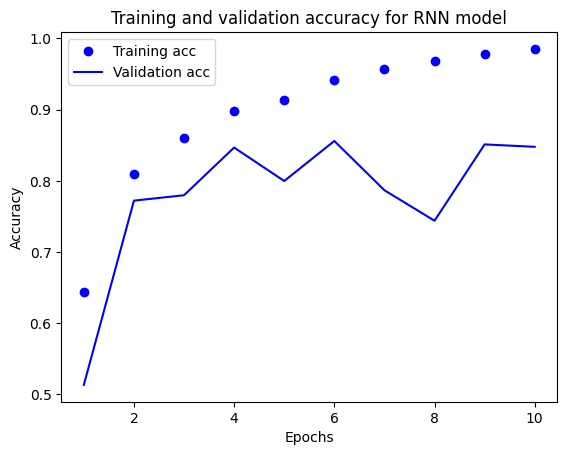

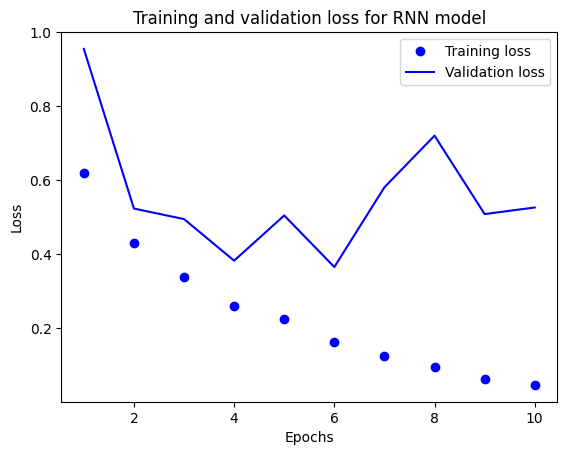

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for RNN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for RNN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
print("\nRNN model test accuracy and loss:")
test_loss_rnn, test_acc_rnn = model.evaluate(input_test, y_test)
print("RNN model test accuracy:", test_acc_rnn)
print("RNN model test loss:", test_loss_rnn)


RNN model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8363 - loss: 0.5667
RNN model test accuracy: 0.8388000130653381
RNN model test loss: 0.5580159425735474


Тепер виконаємо побудову і навчання LSTM моделі. Для цього нам потрібно з tensorflow імпортувати LSTM і Bidirectional (Для обробки послідовності в обох напрямках і для кращого контексту)

In [11]:
from tensorflow.keras.layers import LSTM, Bidirectional

In [12]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_lstm = model_lstm.fit(input_train, y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - acc: 0.5776 - loss: 0.6671 - val_acc: 0.7058 - val_loss: 0.6161
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - acc: 0.8160 - loss: 0.4244 - val_acc: 0.8422 - val_loss: 0.3694
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - acc: 0.8642 - loss: 0.3354 - val_acc: 0.8490 - val_loss: 0.3516
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - acc: 0.8841 - loss: 0.2928 - val_acc: 0.8664 - val_loss: 0.3226
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - acc: 0.8919 - loss: 0.2789 - val_acc: 0.8752 - val_loss: 0.3096
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - acc: 0.8975 - loss: 0.2592 - val_acc: 0.8712 - val_loss: 0.3067
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - acc: 0.9121 - loss: 0.2292 - val_acc: 0.8862 - val_loss: 0.2844
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - acc: 0.9187 - loss: 0.2120 - val_acc: 0.8800 - val_loss: 0.2919
Epoch 9/10
157/157 ━━━━━━━━━━━━━

Тепер виведемо метрики для визначення ефективності моделі LSTM

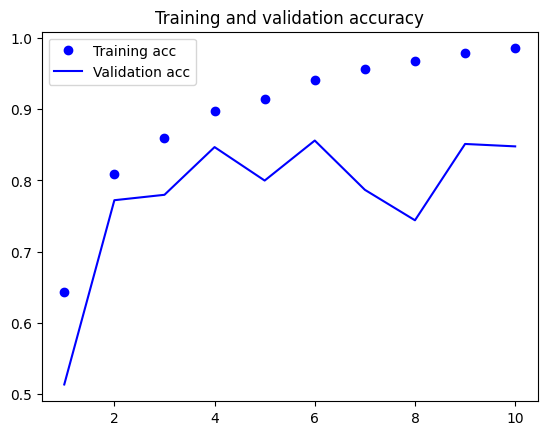

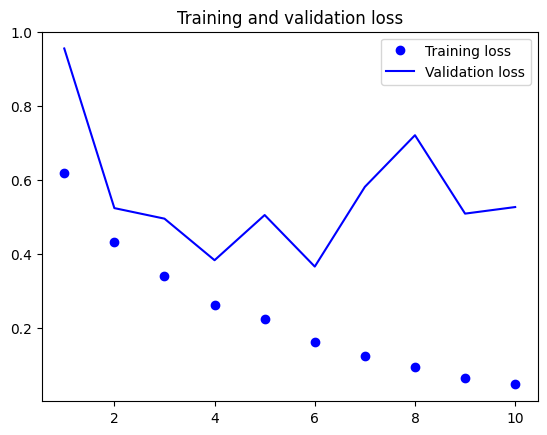

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [14]:
print("\nLSTM model test accuracy and loss:")
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)
print("LSTM model test accuracy:", test_acc_lstm)
print("LSTM model test loss:", test_loss_lstm)


LSTM model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - acc: 0.8646 - loss: 0.3219
LSTM model test accuracy: 0.8684800267219543
LSTM model test loss: 0.31614914536476135


Давайте ще побудуємо двосторонню рекурентну нейронну мережу (Bidirectional RNN)

In [17]:
model_bidirectional_rnn = Sequential()
model_bidirectional_rnn.add(Embedding(max_features, 32))
model_bidirectional_rnn.add(Bidirectional(SimpleRNN(32)))
model_bidirectional_rnn.add(Dense(1, activation='sigmoid'))

model_bidirectional_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_bidirectional_rnn = model_bidirectional_rnn.fit(input_train, y_train,
                                                        epochs=10,
                                                        batch_size=128,
                                                        validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - acc: 0.5631 - loss: 0.6739 - val_acc: 0.8132 - val_loss: 0.4638
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - acc: 0.8068 - loss: 0.4445 - val_acc: 0.8264 - val_loss: 0.4037
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - acc: 0.8509 - loss: 0.3554 - val_acc: 0.8286 - val_loss: 0.3860
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - acc: 0.8814 - loss: 0.2955 - val_acc: 0.8474 - val_loss: 0.3984
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - acc: 0.9083 - loss: 0.2429 - val_acc: 0.8476 - val_loss: 0.3750
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - acc: 0.9235 - loss: 0.2020 - val_acc: 0.8306 - val_loss: 0.4501
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - acc: 0.9478 - loss: 0.1505 - val_acc: 0.8020 - val_loss: 0.5553
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - acc: 0.9601 - loss: 0.1184 - val_acc: 0.8572 - val_loss: 0.4168
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 

Виведемо графік ефективності для двосторонньої рекурентної моделі

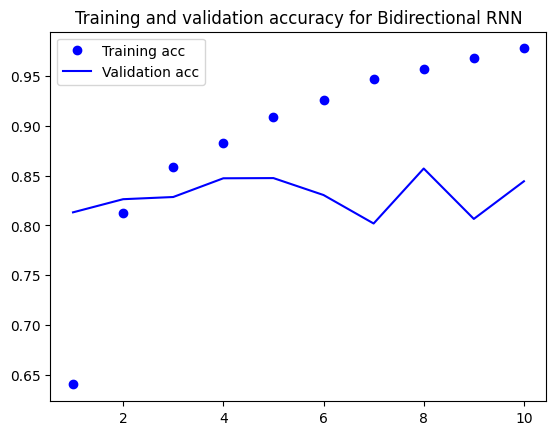

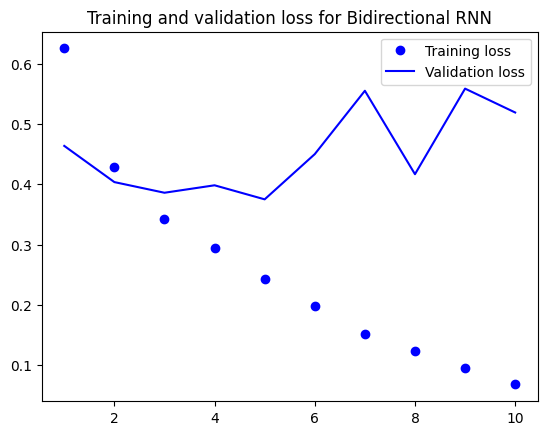

In [19]:
acc_bidirectional_rnn = history_bidirectional_rnn.history['acc']
val_acc_bidirectional_rnn = history_bidirectional_rnn.history['val_acc']
loss_bidirectional_rnn = history_bidirectional_rnn.history['loss']
val_loss_bidirectional_rnn = history_bidirectional_rnn.history['val_loss']

epochs = range(1, len(acc_bidirectional_rnn) + 1)

plt.plot(epochs, acc_bidirectional_rnn, 'bo', label='Training acc')
plt.plot(epochs, val_acc_bidirectional_rnn, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Bidirectional RNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss_bidirectional_rnn, 'bo', label='Training loss')
plt.plot(epochs, val_loss_bidirectional_rnn, 'b', label='Validation loss')
plt.title('Training and validation loss for Bidirectional RNN')
plt.legend()

plt.show()

In [20]:
print("\nBidirectional RNN model test accuracy and loss:")
test_loss_bidirectional_rnn, test_acc_bidirectional_rnn = model_bidirectional_rnn.evaluate(input_test, y_test)
print("Bidirectional RNN model test accuracy:", test_acc_bidirectional_rnn)
print("Bidirectional RNN model test loss:", test_loss_bidirectional_rnn)


Bidirectional RNN model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.8458 - loss: 0.5077
Bidirectional RNN model test accuracy: 0.8438400030136108
Bidirectional RNN model test loss: 0.5119540095329285


І тепер давайте побудуємо ГЛИБОКУ РЕКУРЕНТНУ НЕЙРОННУ МЕРЕЖУ (Deep RNN)

In [21]:
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 32))
model_deep_rnn.add(SimpleRNN(32, return_sequences=True))
model_deep_rnn.add(SimpleRNN(32))
model_deep_rnn.add(Dense(1, activation='sigmoid'))

model_deep_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_deep_rnn = model_deep_rnn.fit(input_train, y_train,
                                      epochs=10,
                                      batch_size=128,
                                      validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - acc: 0.5744 - loss: 0.6657 - val_acc: 0.7982 - val_loss: 0.4465
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - acc: 0.8128 - loss: 0.4256 - val_acc: 0.8362 - val_loss: 0.3829
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - acc: 0.8681 - loss: 0.3276 - val_acc: 0.8398 - val_loss: 0.4714
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - acc: 0.9033 - loss: 0.2524 - val_acc: 0.8654 - val_loss: 0.3837
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - acc: 0.9543 - loss: 0.1337 - val_acc: 0.7840 - val_loss: 0.5684
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - acc: 0.9768 - loss: 0.0741 - val_acc: 0.7882 - val_loss: 0.6547
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - acc: 0.9890 - loss: 0.0390 - val_acc: 0.8092 - val_loss: 0.6966
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - acc: 0.9933 - loss: 0.0224 - val_acc: 0.7792 - val_loss: 0.8631
Epoch 9/10
157/157 ━━━━━━━━━━━━━

І також побудукємо графік ефективності для глибокої рекурентної моделі

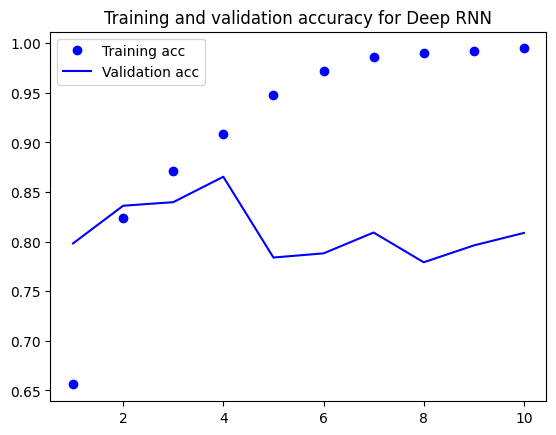

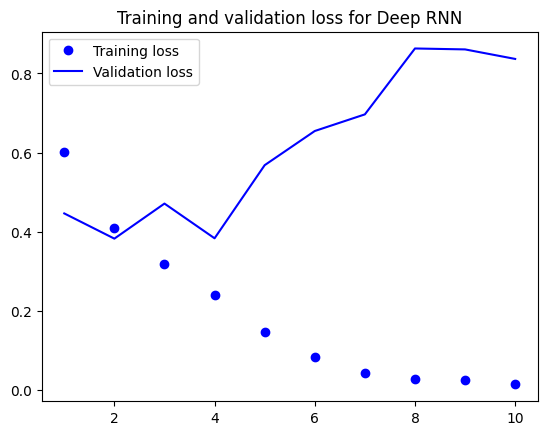

In [27]:
acc_deep_rnn = history_deep_rnn.history['acc']
val_acc_deep_rnn = history_deep_rnn.history['val_acc']
loss_deep_rnn = history_deep_rnn.history['loss']
val_loss_deep_rnn = history_deep_rnn.history['val_loss']

epochs = range(1, len(acc_deep_rnn) + 1)

plt.plot(epochs, acc_deep_rnn, 'bo', label='Training acc')
plt.plot(epochs, val_acc_deep_rnn, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Deep RNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss_deep_rnn, 'bo', label='Training loss')
plt.plot(epochs, val_loss_deep_rnn, 'b', label='Validation loss')
plt.title('Training and validation loss for Deep RNN')
plt.legend()

plt.show()

In [24]:
print("\nDeep RNN model test accuracy and loss:")
test_loss_deep_rnn, test_acc_deep_rnn = model_deep_rnn.evaluate(input_test, y_test)
print("Deep RNN model test accuracy:", test_acc_deep_rnn)
print("Deep RNN model test loss:", test_loss_deep_rnn)


Deep RNN model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.8074 - loss: 0.8325
Deep RNN model test accuracy: 0.8051999807357788
Deep RNN model test loss: 0.8536807298660278


У цьому завданні ми створили такі мережі:

<b>Базова RNN (Recurrent Neural Network):</b> Вона є досить нескладно., але відома тим. що містить певний недолік - має тенденцію до проблеми зниклого градієнта. Саме тому вона може давати гірший результат в задачах, де існують довгострокові заленості.

В ході завдання ми отримали метрики ефективності даної моделі:
RNN model test accuracy: 0.8676400184631348
RNN model test loss: 0.40992283821105957

<b>LSTM (Long Short-Term Memory):</b> Використовується для моделювання посліовностей, вона дозволяє зрозуміти та використати довгострокові залежності в них. Це дуже доречно при роботі з текстовими даними, де можуть бути довгострокові залежності між словами та фразами.

Провівши аналіз ми отримали метрики ефективності даної моделі:
LSTM model test accuracy: 0.8849999904632568
LSTM model test loss: 0.31637734174728394

<b>BRNN (Bidirectional RNN):</b> Двостороння RNN корисна при послідовностях, які мають контекст в обидві сторони. Але так як ми маємо справу з текстовими даними, то ця особливість не покаже тої ефективності.

Тут ми отримали метрики ефективності:
Bidirectional RNN model test accuracy: 0.834119975566864
Bidirectional RNN model test loss: 0.5218986868858337

<b>DRNN (Deep RNN):</b> Глибока RNN вирішує проблему з зникненнм градієнта, і дозволяє моделі поглибитись у складніші залежності в даних. Але так як ми маємо справу з текстовими даними, додавання додаткових шарів може призвести до перенавчання.

Метрики ефективності даної моделі становлять :
Deep RNN model test accuracy: 0.7355599999427795
Deep RNN model test loss: 1.290126085281372

<h1>Висновок</h1>

<h3>Ознайомившись з результатами ефективності різних моделей ми досить чудово ознайомилися з наглядною роботою цих моделей на даному типі датасету.</h3>

Найефективнішою для даного типу задач показала себе <span style="color: red">LSTM (Long Short-Term Memory)</span>, що дала кращий результат ніж базова RNN (Recurrent Neural Network).

Використання ж Двосторонньої та Глибокої RNN для такої задач не проявляє такої ефективності, оскільки створені для більш складніших задач з більшою кількістю даних.